In [2]:
#GET DATA
import os
import pandas as pd

categories = ["blues", "classical-music", "country", "electronic", "experimental", "folk", "jazz", "pop", "r-b", "rap", "rock"]
#initialize lists of data
lyrics = []
primary_tags = []
for category in categories:
    directory_path = "../../data/multilabel/lyrics/"+category
    directory = os.fsencode(directory_path)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        full_path = os.path.join(directory_path, str(filename))
        if os.path.exists(full_path):
            with open(full_path, 'r', encoding='cp850') as src: #changed encoding for reading "-" in filename I believe
                lyric = src.read()
            lyrics.append(lyric)
            primary_tags.append(category)


df = pd.DataFrame({"lyric": lyrics, "category":primary_tags})
df.head()

,lyric,category
0,"And you got me like, oh\nWhat you want from me...",blues
1,There is a house in New Orleans\nThey call the...,blues
2,You got a fast car\nI want a ticket to anywher...,blues
3,"Waking up, half-past five\nBlood on pillow and...",blues
4,"Her eyes and words are so icy\nOh, but she bur...",blues


In [37]:
#DATA CLEANING
import re

#remove punctuation
df['lyric_processed'] = \
df['lyric'].map(lambda x: re.sub('[(),\.!?]', '', x))
#make lowercase
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: x.lower())
df['lyric_processed'].loc[1]

"there is a house in new orleans\nthey call the rising sun\nand it's been the ruin of many a poor boy\nand god i know i'm one\n\n[verse 1]\nmy mother was a tailor\nshe sewed my new blue jeans\nmy father was a gamblin' man\ndown in new orleans\n\n[verse 2]\nnow the only thing a gambler needs\nis a suitcase and a trunk\nand the only time he's satisfied\nis when he's on a drug\n[instrumental break 01:43-02:28]\n[organ solo]\n\n[verse 3]\noh mothers tell your children\nnot to do what i have done\nspend your lives in sin and misery\nin the house of the rising sun\nyou might also like[verse 4]\nwell i got one foot on the platform\nthe other foot on the train\ni'm goin' back to new orleans\nto wear that ball and chain\n\n[chorus]\nwell there is a house in new orleans\nthey call the rising sun\nand it's been the ruin of many a poor boy\nand god i know i'm one"

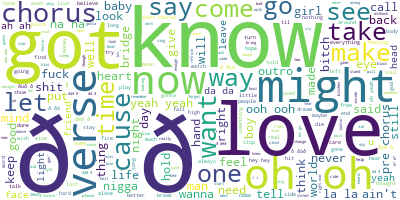

In [4]:
#WORDCLOUD AS EXTRAPOLARYY DATA ANALYSIS
from wordcloud import WordCloud

long_string = ','.join(list(df['lyric_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [41]:
'''
Things to do:
1.) Whats the sigma meaning and why is it there two times
2.) Need to filter out chorus, verse, pre-chorus, verse 4, ... all starts as a line with [
3.) Do I want stuff like oh oh or la la or na na or da da, and how would I filter it without taking out a single Oh 
'''
#remove verse and stuff
pattern = r'\[(.*?)\]'
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: re.sub(pattern, '', x))

#remove line breaks
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: re.sub(r'\n', ' ', x))

#remove extra spaces
df['lyric_processed'] = \
df['lyric_processed'].map(lambda x: re.sub(' +', ' ', x))

print(df['lyric_processed'].loc[0])
df['lyric_processed'].head()

and you got me like oh what you want from me what you want from me and i tried to buy your pretty heart but the price too high baby you got me like oh mmm you love when i fall apart fall apart so you can put me together and throw me against the wall baby you got me like i woo i don't you stop loving me loving me don't quit loving me loving me just start loving me oh loving me and babe i'm fist-fighting with fire just to get close to you can we burn something babe and i'll run for miles just to get a taste must be love on the brain that's got me feeling this way feeling this way it beats me black and blue but it fucks me so good and i can't get enough must be love on the brain yeah and it keeps cursing my name cursing my name no matter what i do i'm no good without you and i can't get enough must be love on the brain you might also like baby keep loving me just love me yeah just love me all you need to do is love me yeah got me like ow i'm tired of being played like a violin what do i g

0    and you got me like oh what you want from me w...
1    there is a house in new orleans they call the ...
2    you got a fast car i want a ticket to anywhere...
3    waking up half-past five blood on pillow and o...
4    her eyes and words are so icy oh but she burns...
Name: lyric_processed, dtype: object

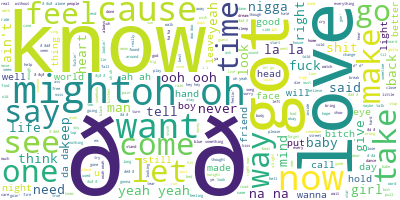

In [45]:
#WORDCLOUD AS EXTRAPOLARYY DATA ANALYSIS: Problems solved?
from wordcloud import WordCloud

long_string = ','.join(list(df['lyric_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [43]:
'''
Further Problems: 
1.) sometimes not in englisch language
2.) Stuff like F-R-I-E-N-D-S: How do I automatically turn that into friends without any collatoral damage
3.) 
'''

'\nFurther Problems:\n'

In [56]:
print(df[df.category=="classical-music"]["lyric"])


[Verse 1: Asha Bhosle]
Óñ▓Óñ¥-Óñ▓Óñ¥-Óñ▓Óñ¥-Óñ▓Óñ¥-Óñ▓Óñ¥
ÓññÓÑé, ÓññÓÑé Óñ╣ÓÑê ÓñÁÓñ╣ÓÑÇ ÓñªÓñ┐Óñ▓ Óñ¿ÓÑç Óñ£Óñ┐Óñ©ÓÑç ÓñàÓñ¬Óñ¿Óñ¥ ÓñòÓñ╣Óñ¥
ÓññÓÑé Óñ╣ÓÑê Óñ£Óñ╣Óñ¥Óñü, Óñ«ÓÑêÓñé Óñ╣ÓÑéÓñü ÓñÁÓñ╣Óñ¥Óñü
ÓñàÓñ¼ ÓññÓÑï Óñ»ÓÑç Óñ£ÓÑÇÓñ¿Óñ¥, ÓññÓÑçÓñ░ÓÑç Óñ¼Óñ┐Óñ¿ Óñ╣ÓÑê Óñ©Óñ£Óñ╝Óñ¥

[Chorus: Asha Bhosle]
ÓñôÓñ╣, Óñ«Óñ┐Óñ▓ Óñ£Óñ¥ÓñÅÓñü ÓñçÓñ© ÓññÓñ░Óñ╣, ÓñªÓÑï Óñ▓Óñ╣Óñ░ÓÑçÓñé Óñ£Óñ┐Óñ© ÓññÓñ░Óñ╣
Óñ½Óñ┐Óñ░ Óñ╣ÓÑï Óñ¿ Óñ£ÓÑüÓñªÓñ¥, Óñ╣Óñ¥Óñü Óñ»ÓÑç ÓñÁÓñ¥ÓñªÓñ¥ Óñ░Óñ╣Óñ¥
Óñ▓Óñ¥-Óñ▓Óñ¥-Óñ▓Óñ¥-Óñ▓Óñ¥-Óñ▓Óñ¥

[Verse 2: Asha Bhosle]
Óñ«ÓÑêÓñé ÓñåÓñÁÓñ¥Óñ£Óñ╝ Óñ╣ÓÑéÓñü ÓññÓÑï, ÓññÓÑé Óñ╣ÓÑê ÓñùÓÑÇÓññ Óñ«ÓÑçÓñ░Óñ¥
Óñ£Óñ╣Óñ¥Óñé Óñ©ÓÑç Óñ¿Óñ┐Óñ░Óñ¥Óñ▓Óñ¥ Óñ«Óñ¿Óñ«ÓÑÇÓññ Óñ«ÓÑçÓñ░Óñ¥
Óñ«Óñ┐Óñ▓ Óñ£Óñ¥ÓñÅÓñü ÓñçÓñ© ÓññÓñ░Óñ╣, ÓñªÓÑï Óñ▓Óñ╣Óñ░ÓÑçÓñé Óñ£Óñ┐Óñ© ÓññÓñ░Óñ╣
ÓñôÓñ╣, Óñ«Óñ┐Óñ▓ Óñ£Óñ¥ÓñÅÓñü ÓñçÓñ© ÓññÓñ░Óñ╣, ÓñªÓÑï Óñ▓Óñ╣Óñ░ÓÑçÓñé Óñ£Óñ┐Óñ© ÓññÓñ░Óñ╣
Óñ½Óñ┐Óñ░ Óñ╣ÓÑï Óñ¿ Óñ£ÓÑüÓñªÓñ¥, Óñ╣Óñ¥Óñü Óñ»ÓÑç ÓñÁÓñ¥ÓñªÓñ¥ Óñ░Óñ╣Óñ¥

[Verse 3: Kishore Kumar and Asha Bhosle]
ÓñòÓñ┐Óñ©ÓÑÇ Óñ«ÓÑïÓñíÓñ╝ 